In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
#data Set Loading
df = pd.read_csv('data.csv')

In [4]:
#DataInfo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
# Check for duplicated rows
df.duplicated().sum()


0

In [8]:
# Check for missing values
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
# Group by city and calculate the average cost
average_cost_by_city = df.groupby('City')['Average Cost for two'].mean()
df.groupby('City')['Average Cost for two'].mean()

City
Abu Dhabi           182.000000
Agra               1065.000000
Ahmedabad           857.142857
Albany               19.750000
Allahabad           517.500000
                      ...     
Weirton              25.000000
Wellington City      71.250000
Winchester Bay       25.000000
Yorkton              25.000000
��stanbul            81.428571
Name: Average Cost for two, Length: 141, dtype: float64

In [11]:
# Sort values in descending order
average_cost_by_city_sorted = average_cost_by_city.sort_values(ascending=False)
average_cost_by_city.sort_values(ascending=False)

City
Jakarta           308437.500000
Tangerang         250000.000000
Bogor             160000.000000
Bandung           150000.000000
Pasay City          3333.333333
                      ...      
Mc Millan             10.000000
Inverloch              7.000000
Lakes Entrance         7.000000
Dicky Beach            7.000000
Miller                 0.000000
Name: Average Cost for two, Length: 141, dtype: float64

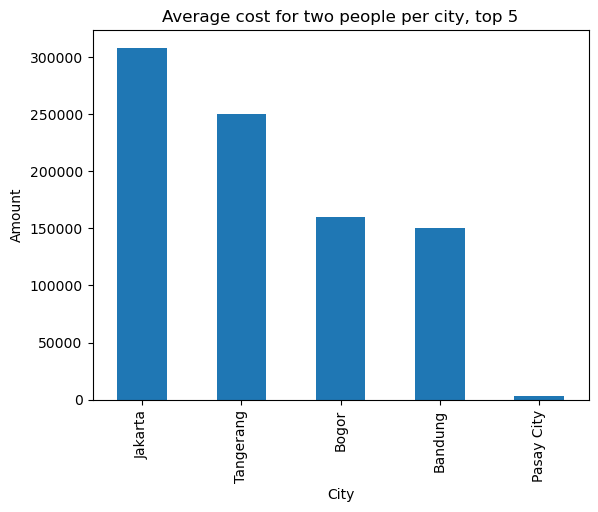

In [12]:
# Plot 5 cities with the highest average cost for two people
average_cost_by_city_sorted.head().plot(kind='bar')
plt.title("Average cost for two people per city, top 5")
plt.xlabel("City")
plt.ylabel('Amount')
plt.show()

In [13]:
# Group by cuisines and calculate the total number of votes
votes_by_cuisine = df.groupby("Cuisines")['Votes'].sum().reset_index()


In [14]:
# Display cuisines with zero votes
zero_votes_cuisine = votes_by_cuisine[votes_by_cuisine["Votes"] == 0].head()

In [15]:
# Display cuisines with non-zero votes
non_zero_votes_cuisine = votes_by_cuisine[votes_by_cuisine["Votes"] != 0].head(20)


C:\Users\ossum\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


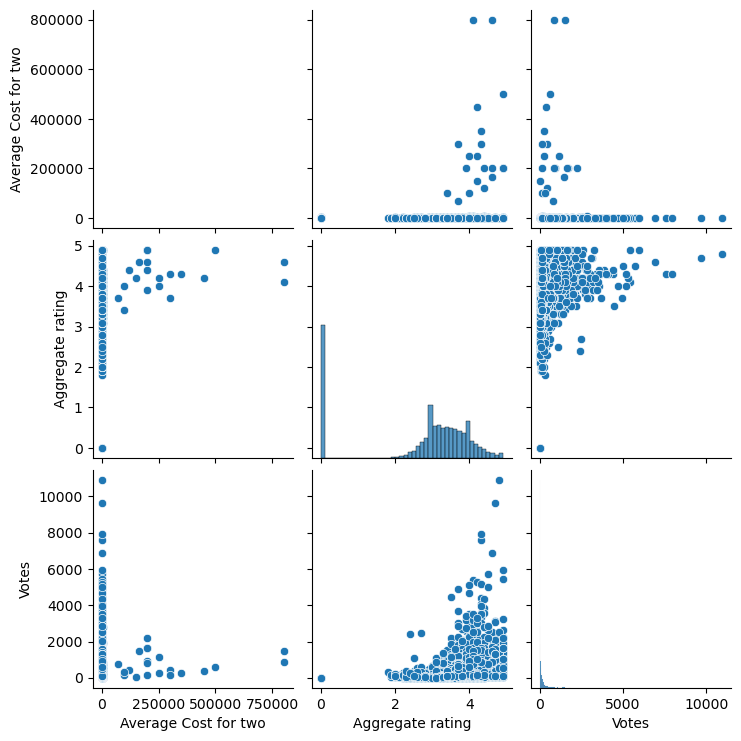

In [16]:
# Plot pairplot to see the correlations
sns.pairplot(df[['Average Cost for two', 'Aggregate rating', 'Votes']])
plt.show()

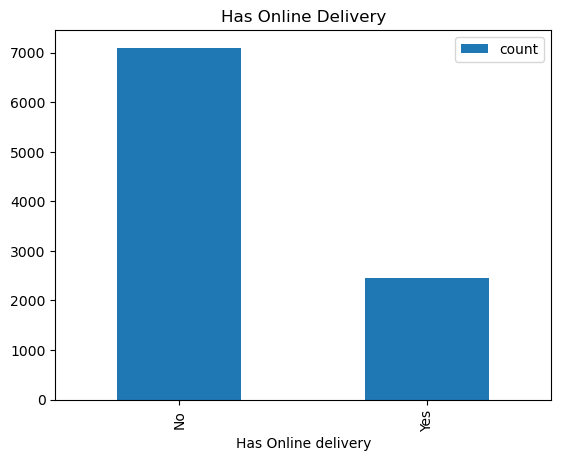

In [17]:

# Plot the distribution of online delivery availability
df['Has Online delivery'].value_counts().plot(kind='bar')
plt.title("Has Online Delivery")
plt.legend()
plt.show()

In [18]:


# Filter out rows with "Not rated" in "Rating text" column
df = df[df["Rating text"] != "Not rated"]


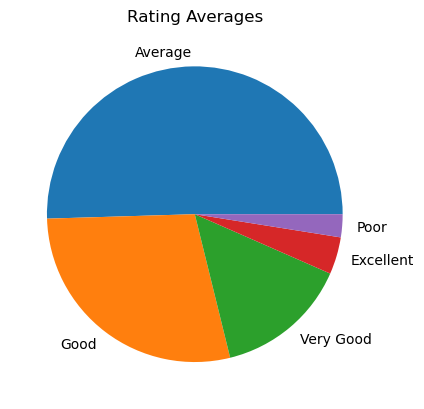

In [19]:

# Plot pie chart for rating averages
df["Rating text"].value_counts().plot(kind='pie')
plt.title("Rating Averages")
plt.ylabel("")
plt.show()


In [20]:
# Preprocessing for machine learning
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [21]:
# Encode categorical variables into numeric values
labelencoder = preprocessing.LabelEncoder()
X = df[['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range']]
X["Has Table booking"] = labelencoder.fit_transform(X['Has Table booking'])
X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])


C:\Users\ossum\AppData\Local\Temp\ipykernel_11996\936313710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Table booking"] = labelencoder.fit_transform(X['Has Table booking'])
C:\Users\ossum\AppData\Local\Temp\ipykernel_11996\936313710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])


In [22]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [23]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Aggregate rating'], test_size=0.23, random_state=42)


In [24]:
# Model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [26]:
# Model evaluation function
def model_results(pred):
    print("Mean Absolute Error is {}".format(mean_absolute_error(y_test, pred)))
    print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(y_test, pred))))

In [27]:
# Display model evaluation results
model_results(lr_pred)

Mean Absolute Error is 0.40114791413105927
Root Mean Squared Error is 0.5046286455663996


In [28]:
lr_pred

array([3.22254108, 3.42509426, 3.16261122, ..., 3.87640724, 3.16251497,
       3.87794722])

In [29]:
# Support vector
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()

In [30]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [31]:
clf = GridSearchCV(svrmodel, parameters)

In [32]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [33]:
predictgridsvr=clf.predict(X_test)

In [34]:
model_results(predictgridsvr)

Mean Absolute Error is 0.3791806264705149
Root Mean Squared Error is 0.4823419480407078


In [35]:
 from sklearn.tree import DecisionTreeRegressor

In [36]:
param_grid= {
    "max_depth":[10,30],
    "min_samples_leaf":[1,2],
    "min_samples_split":[2,5]
}

In [37]:
treemdoel = DecisionTreeRegressor()

In [38]:
grid_tree = GridSearchCV(estimator=treemdoel, param_grid=param_grid)

In [39]:
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [40]:
treepredictions=grid_tree.predict(X_test)

In [41]:
model_results(treepredictions)

Mean Absolute Error is 0.35803477819441587
Root Mean Squared Error is 0.45167236445840064


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
ranmodel =RandomForestRegressor()

In [44]:
param_grid ={"max_depth":[2,15], "n_estimators":[2,5,15,10]}

In [45]:
gridrfr = GridSearchCV(ranmodel, param_grid)

In [46]:
gridrfr.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 15], 'n_estimators': [2, 5, 15, 10]})

In [47]:
randomforestpredictions = gridrfr.predict(X_test)

In [48]:
model_results(randomforestpredictions )

Mean Absolute Error is 0.35751393096672723
Root Mean Squared Error is 0.45165565882552056


In [49]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_param_grid = {"n_neighbors":[9, 15, 21,11, 12]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [51]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 15, 21, 11, 12]})

In [52]:
knnpreds = knn_grid_search.predict(X_test)

In [53]:
model_results(knnpreds)

Mean Absolute Error is 0.3635740849481307
Root Mean Squared Error is 0.4562517091381327


In [54]:
knn_grid_search.best_params_

{'n_neighbors': 21}

In [55]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {"n_estimators":[50, 100, 200],
                 "learning_rate":[0.1,0.5,1]}
ada_grid_search = GridSearchCV(ada, ada_param_grid)

In [56]:
ada_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [57]:
adapreds = ada_grid_search.predict(X_test)


In [58]:
model_results(adapreds)

Mean Absolute Error is 0.37022494822404345
Root Mean Squared Error is 0.46235953713895556


In [59]:
import joblib
joblib.dump(gridrfr, "model.pkl")

['model.pkl']